# Decision Tree Classifier

In [1]:
from init import *

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
def DTC(_X=None, _Xt=None):
    if _X is None:
        _X = X
    
    if _Xt is None:
        _Xt = Xt
    
    msg("[DTC] Training")
    dtc = DecisionTreeClassifier()
    dtc.fit(X, y)
    done()
    
    msg("[DTC] Training Accuracy")
    X_pred = dtc.predict(X)
    msg(metrics.accuracy_score(y, X_pred))
    done()
    
    msg("[DTC] Testing Accuracy")
    Xt_pred = dtc.predict(Xt)
    msg(metrics.accuracy_score(yt, Xt_pred))
    done()

In [5]:
DTC()

[DTC] Training ... done.
[DTC] Training Accuracy ... 0.85636 ... done.
[DTC] Testing Accuracy ... 0.2679 ... done.


#### Results
The model is over-fitting. Why?

### PCA/200

In [21]:
# pca = PCA(n_components=200)
# pca.fit(X, y)

PCA(copy=True, n_components=200, whiten=False)

In [9]:
# X_pca = pca.transform(X)
# Xt_pca = pca.transform(Xt)

X_pca = pyload("pickles/X_pca_200.pickle")
Xt_pca = pyload("pickles/Xt_pca_200.pickle")

In [26]:
DTC(_X=X_pca, _Xt=Xt_pca)

[DTC] Training ... done.
[DTC] Training Accuracy ... 1.0 ... done.
[DTC] Testing Accuracy ... 0.2724 ... done.


#### Results
Decision Trees overfit the multi-class classification problem. I'm not sure if we can generalize this observation.

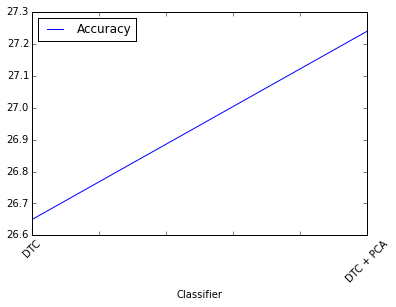

In [36]:
res = pd.DataFrame([
        ['DTC', 26.65],
        ['DTC + PCA', 27.24]
    ], columns=['Classifier', 'Accuracy'])
res.plot(x='Classifier', y='Accuracy', rot=45)

In [37]:
res

,Classifier,Accuracy
0,DTC,26.65
1,DTC + PCA,27.24


## Voting Classifiers

In [10]:
from sklearn.cross_validation import StratifiedKFold

clfs = []
for train_index, test_index in StratifiedKFold(y, n_folds=10):    
    msg("[DTC] Training")
    dtc = DecisionTreeClassifier()
    dtc.fit(X_pca[train_index], y[train_index])
    done()

    msg("[DTC] Testing Accuracy")
    Xt_pred = dtc.predict(X_pca[test_index])
    msg(metrics.accuracy_score(y[test_index], Xt_pred))
    done()
    
    clfs += [dtc]

[DTC] Training ... done.
[DTC] Testing Accuracy ... 0.26 ... done.
[DTC] Training ... done.
[DTC] Testing Accuracy ... 0.2556 ... done.
[DTC] Training ... done.
[DTC] Testing Accuracy ... 0.259 ... done.
[DTC] Training ... done.
[DTC] Testing Accuracy ... 0.2694 ... done.
[DTC] Training ... done.
[DTC] Testing Accuracy ... 0.259 ... done.
[DTC] Training ... done.
[DTC] Testing Accuracy ... 0.2564 ... done.
[DTC] Training ... done.
[DTC] Testing Accuracy ... 0.2708 ... done.
[DTC] Training ... done.
[DTC] Testing Accuracy ... 0.2594 ... done.
[DTC] Training ... done.
[DTC] Testing Accuracy ... 0.2532 ... done.
[DTC] Training ... done.
[DTC] Testing Accuracy ... 0.2566 ... done.


In [17]:
Xt_preds = np.zeros((Xt.shape[0], 10))
for clf in clfs:
    Xt_preds += clf.predict_proba(Xt_pca)
Xt_Preds = Xt_preds / 10
metrics.accuracy_score(yt, Xt_preds.argmax(axis=1))

0.36209999999999998